# Preventing Credit Card Fraud with Advanced Machine Learning Models

## Abstract

In this work, we address the problem of fraudulent credit card transactions and conduct a formal analysis and performance evaluation of a range of widely-used supervised and unsupervised machine learning techniques for fraud detection. First, we preprocess an open dataset available to the online community on [Kaggle](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?select=creditcard.csv) to extract relevant information and analyze the intrinsic issues within the dataset that impact fraud detection [[1](https://www.sciencedirect.com/science/article/abs/pii/S2214212618304216), [2](https://www.aaai.org/Papers/Workshops/2000/WS-00-05/WS00-05-003.pdf), [3](https://ieeexplore.ieee.org/abstract/document/7376606)] (data scarcity, data heterogeneity, stationarity, cold start, and data imbalance). We further use this dataset to train supervised learning algorithms and analyze the performance of different models using Python libraries to establish a benchmark for evaluating and selecting the best model.

**Keywords**: Fraud detection, machine learning, data imbalance, Python.

## 1. Introduction

E-commerce undoubtedly constitutes a paradigm shift in business today. In addition to the design and implementation of efficient e-commerce platforms for buying and selling goods and services using various devices such as personal computers, tablets, and smartphones, the backbone of such commercial operations is the use of credit cards, without which electronic exchanges would be meaningless. Consequently, there has been an explosive increase in credit card transactions in recent years, leading to a shift in business dynamics. While the era of Big Data and new technologies offers unprecedented opportunities to improve quality of life and social well-being, they are not entirely free from problems, creating inefficiencies in their implementation. In the specific case of credit card transactions, fraud is a significant issue, leading to short-term financial losses that affect not only banks and merchants but also individual customers. In the long term, fraud can negatively impact a company's image, causing defrauded customers to lose trust and turn to competitors [[4](https://www.sciencedirect.com/science/article/abs/pii/S095741741400089X)]. According to an analysis by "Euromonitor International," the financial cost associated with fraud has increased in the Europe, Middle East, and Africa (EMEA) region from 2006 to 2016, while the "Association of Certified Fraud Examiners" found that 15% of fraud cases involve credit card transactions, representing 80% of the total financial value [[1](https://www.sciencedirect.com/science/article/abs/pii/S2214212618304216)].

Although the concept of fraud, as old as humanity itself, is much broader than fraudulent transactions, this work focuses specifically on the latter. To prevent fraud, two types of actions are taken: fraud prevention and fraud detection [[5](https://www.semanticscholar.org/paper/Adaptive-Machine-Learning-for-Credit-Card-Fraud-Pozzolo-Bontempi/bcfbf068dff507b9ef11240e69f96d24f5d89fc1)]. The difference between them is that the former is a proactive measure, anticipating fraud by blocking it at its origin, while the latter is a reactive process, identifying whether a new credit card transaction belongs to the class of fraudulent or genuine transactions based on historical transaction data. Any Fraud Detection System (FDS) must overcome two fundamental issues: efficiency and cost-effectiveness. Efficiency means that the system must accurately determine whether a transaction is fraudulent, and cost-effectiveness implies that the cost of detection should not exceed the financial losses due to fraud. Here, machine learning techniques become attractive solutions as they are highly efficient and cost-effective compared to expert intervention (which is not excluded but complemented by ML methods, significantly reducing human effort). Furthermore, machine learning algorithms excel in detecting fraudulent transactions as supervised techniques can be trained on past transaction data to learn fraudulent patterns, and unsupervised algorithms can address fraudsters' changing behaviors to develop new fraud patterns [[6](https://www.sciencedirect.com/science/article/abs/pii/S0020025519304451)]. Numerous efforts and contributions have been made to apply machine learning techniques to fraud detection, such as Convolutional Neural Networks (CNN) [[7](https://link.springer.com/chapter/10.1007/978-3-319-46675-0_53)], Random Forest [[8](https://ieeexplore.ieee.org/abstract/document/8361343)], and other innovative methods [[1](https://www.sciencedirect.com/science/article/abs/pii/S2214212618304216)]. In line with this, this work aims to conduct a comparative study of various supervised and unsupervised machine learning algorithms, evaluating their performance in detecting fraudulent transactions [[9](https://arxiv.org/abs/1904.10604), [6](https://www.sciencedirect.com/science/article/abs/pii/S0020025519304451)].

## 2. Dataset Description

The selected dataset corresponds to a set of transactions carried out by credit card holders in Europe over two days in 2013.

In [1]:
# <><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><> #
# Importing libraries
# <><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><> #

# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Module to interact with the OS
import os

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# File name and directory
file_name = 'creditcard.csv'
directory = os.getcwd()

# Full path to the file
full_path = os.path.join(directory, file_name)

# Load the csv file
df = pd.read_csv(full_path)

## 3. Exploratory data analysis

In [3]:
# First rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Last rows
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
# Shape of the dataset
df.shape

(284807, 31)

In [6]:
# Summary statistics
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
# Data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
# Count missing values
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

First of all, we must perform data preprocessing, which leads us in the first instance to determine the number of fraudulent and non-fraudulent transactions in our dataset (binary).

Text(0.5, 1.0, 'Comparison of number of fraudulent transactions (1) vs. non-fraudulent ones (0)')

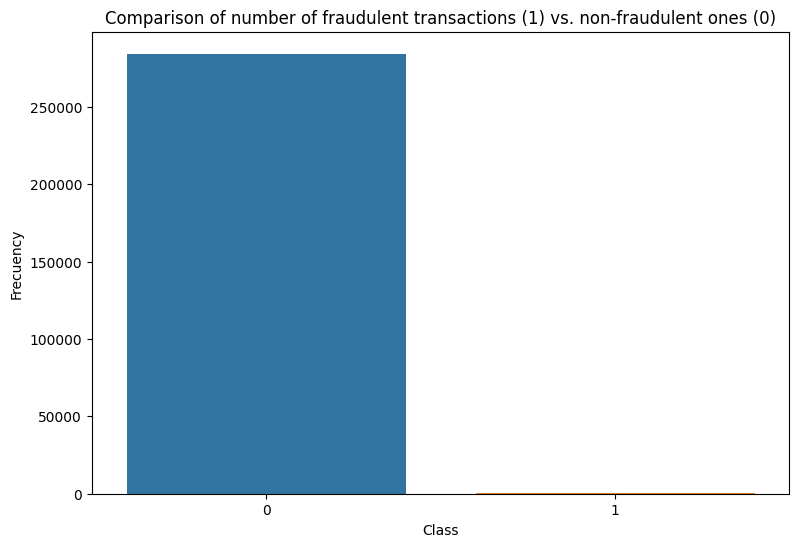

In [9]:
fig, ax = plt.subplots(figsize=(9, 6))
ax = sns.countplot(data=df, x="Class")

ax.set_xlabel("Class")
ax.set_ylabel("Frecuency")
ax.set_title("Comparison of number of fraudulent transactions (1) vs. non-fraudulent ones (0)")

We observed that there is a high degree of imbalance in the data (which requires special treatment). The proportion of non-fraudulent transactions is 492 out of 284,807, which corresponds to 0.17%.

In [10]:
t = df["Class"].count() # total number of transactions
t_plus = df["Class"].value_counts()[0] # number of legitimate transactions
t_minus = df["Class"].value_counts()[1] # number of fraudulent transactions

print("The percentage of legitimate transactions is: ", (t_plus/t)*100, "%")
print("The percentage of fraudulent transactions is:", (t_minus/t)*100, "%")

The percentage of legitimate transactions is:  99.82725143693798 %
The percentage of fraudulent transactions is: 0.1727485630620034 %


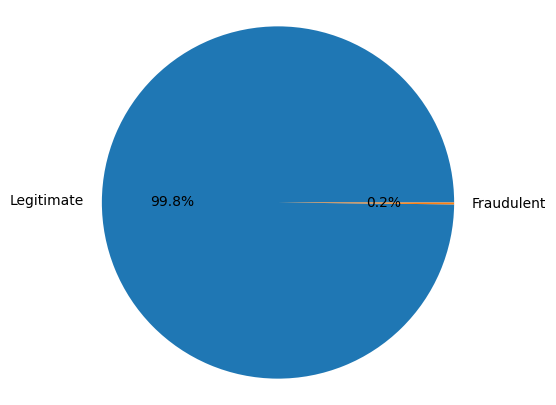

In [11]:
fig, ax = plt.subplots(figsize=(5,5))

labels = "Legitimate", "Fraudulent"
porcentajes = [(t_plus/t)*100, (t_minus/t)*100]
explode = (0, 0.1, 0, 0)

ax.pie(porcentajes, labels=labels,autopct='%1.1f%%')
ax.axis('equal')

plt.show()

Since the information has been anonymized using a principal component analysis (PCA) of the dataset to protect confidentiality, except for time and amount, which respectively contain the seconds elapsed between each transaction and the first in the dataset and the amount of the underlying transaction, we need to further analyze these two variables.

In [12]:
# Variables that require special analysis
time_parameters = df["Time"].describe()
quantity_parameters = df["Amount"].describe()

print("Relevant data of the time interval variable:")
print(time_parameters)
print("\n")
print("Relevant data of the amount variable:")
print(quantity_parameters)

Relevant data of the time interval variable:
count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64


Relevant data of the amount variable:
count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


As can be seen from the following graphs, the amount distribution is highly skewed to the right since a very small portion of the transactions are close to the maximum amount which corresponds to \\$25691.16, the mean value for this distribution is \\$88.35. On the contrary, unlike the amount distribution, the temporal distribution is bimodal, this is because there is a drop in transaction activity approximately 27.78 hours after the first transaction, which makes it reasonable to assume that the drop in transaction volume occurred during the night since users sleep at this stage of the day and activity levels drop.

Text(0.5, 1.0, 'Amount Distribution')

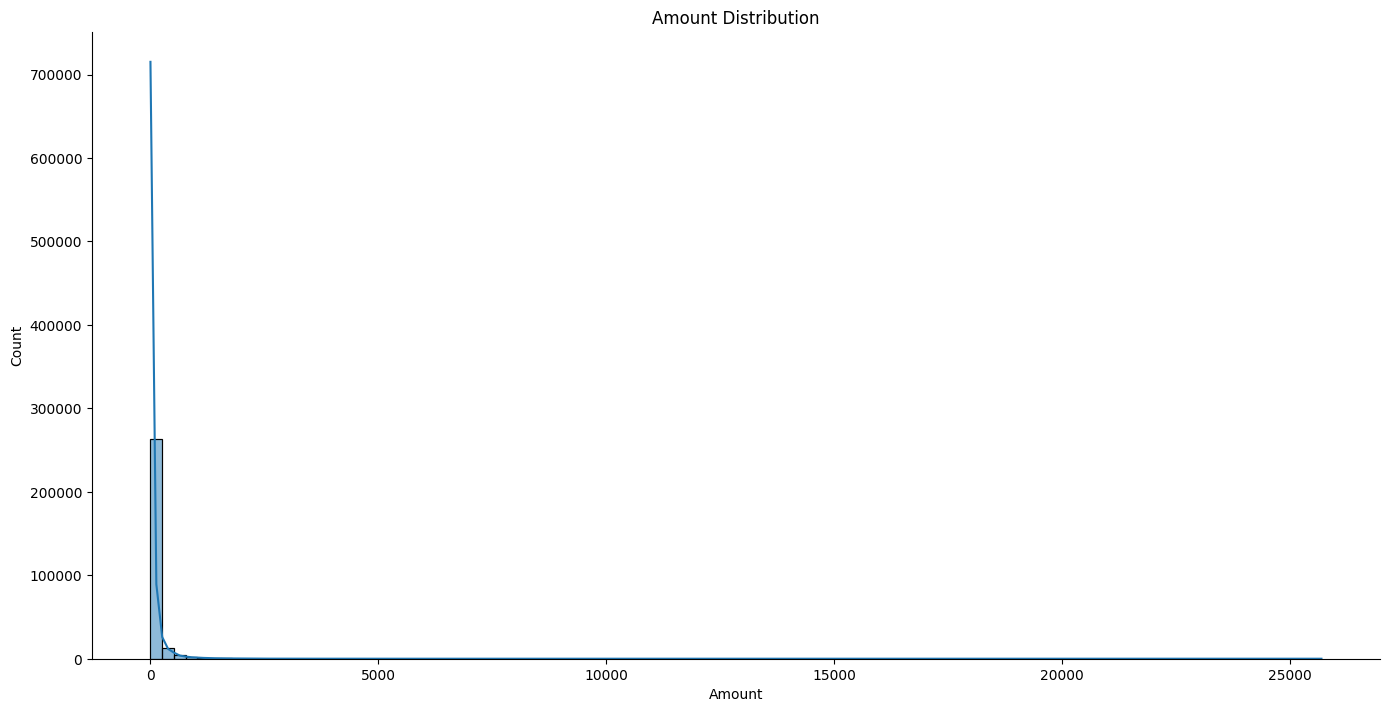

In [13]:
sns.displot(data=df, x="Amount", height=7, aspect=2.0, bins=100, kde=True)

plt.xlabel("Amount")
plt.title("Amount Distribution")

Text(0.5, 1.0, 'Temporal distribution')

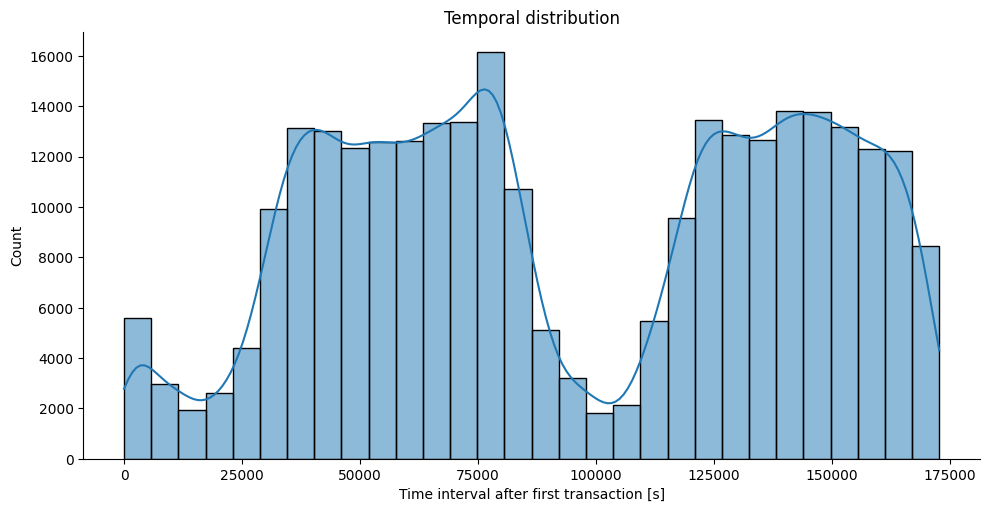

In [14]:
sns.displot(data=df, x="Time", height=5, aspect=2.0, bins=30, kde=True)

plt.xlabel("Time interval after first transaction [s]")
plt.title("Temporal distribution")

The remaining variables are obtained from a principal component analysis (PCA), a method that results in a set of uncorrelated variables and allows for dimensionality reduction.

To confirm that there are no significant correlations between the reduced components (particularly with the class characteristic), we calculate the correlation matrix.

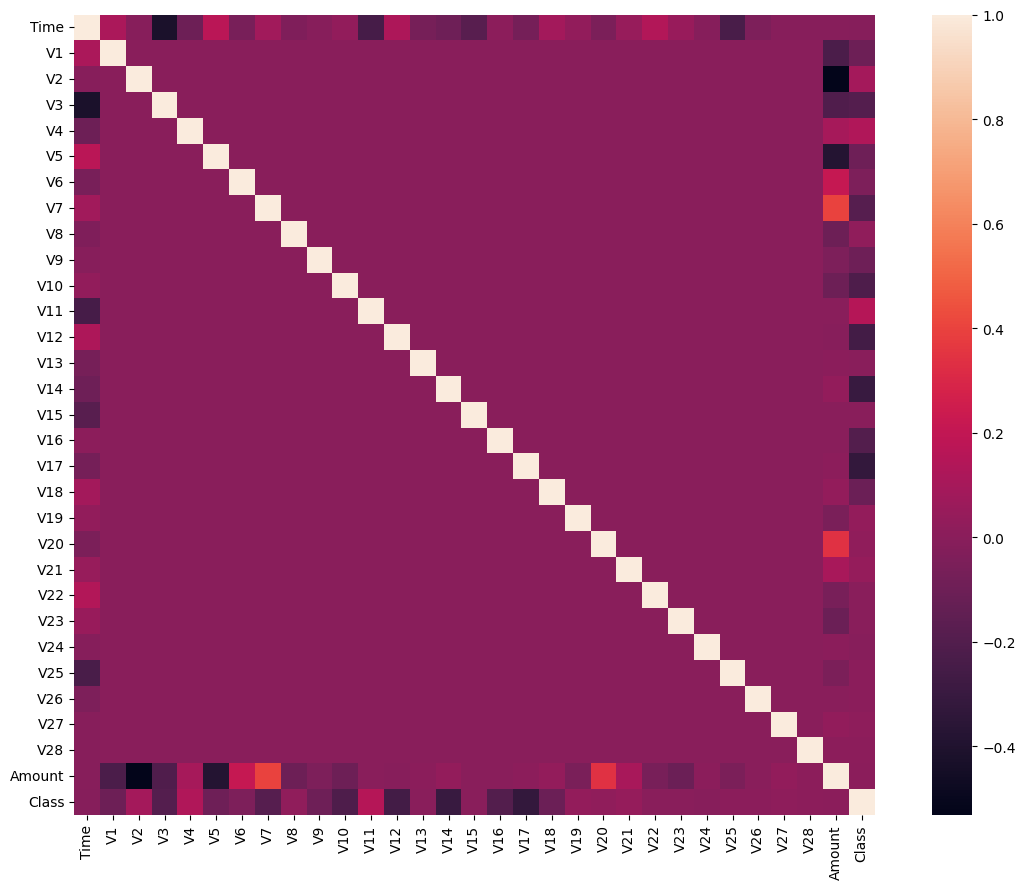

In [15]:
corr_df = df.corr()
fig, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corr_df, vmax=1.0, square = True)
plt.tight_layout()

Since the main features do not present strong correlations between them, it is not necessary to eliminate any of the variables.

The distributions of the 28 characteristics V1, V2, ..., V28 are presented below in the form of histograms. As expected, even if it is a dataset transformed by PCA, the variables are not normally distributed. In the graphs it can be observed that some of the distributions are skewed to the left and others to the right.

In total there are 31 variables, of which 28 are the features variables and the rest correspond to time, amount and class. Of all of them, the only ones that have not been transformed by PCA are time and amount and on the other hand, the class variable corresponds to our target variable which is the only categorical variable.

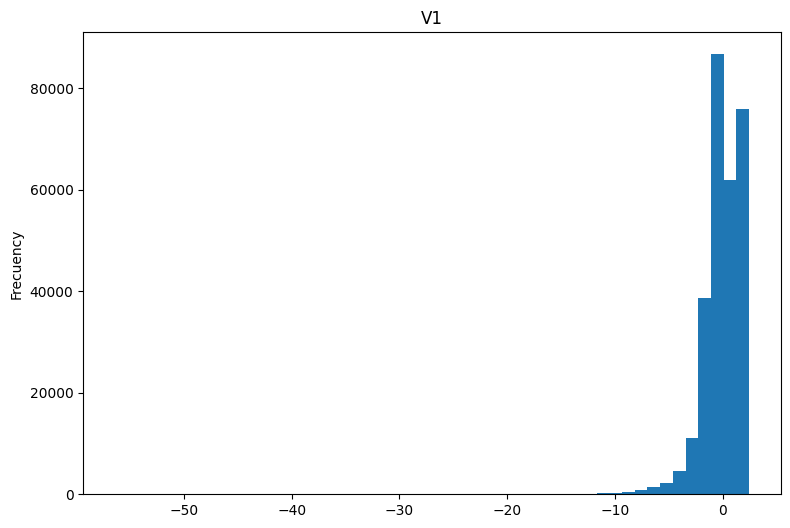

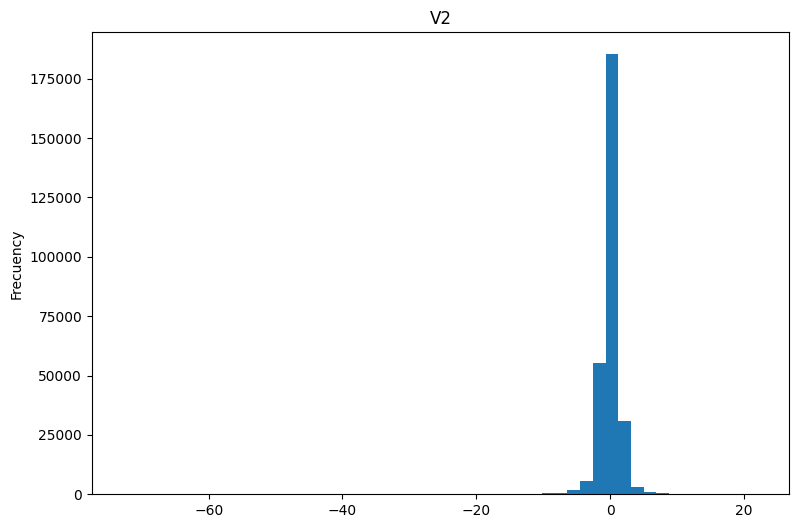

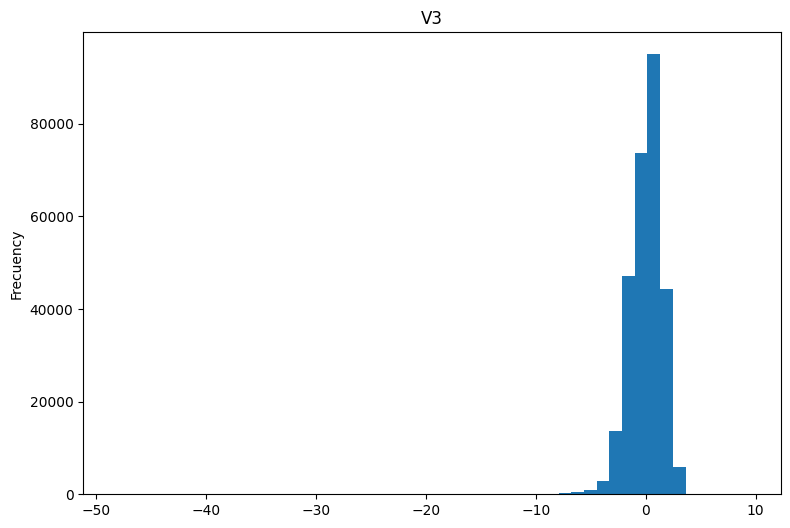

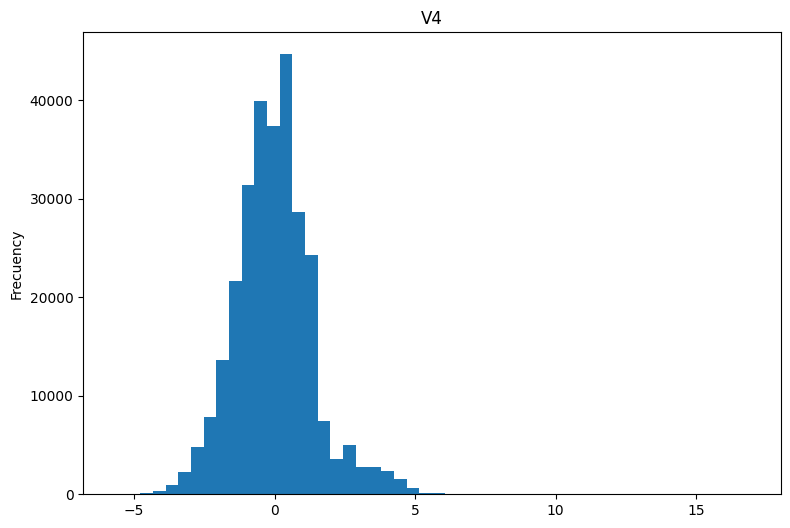

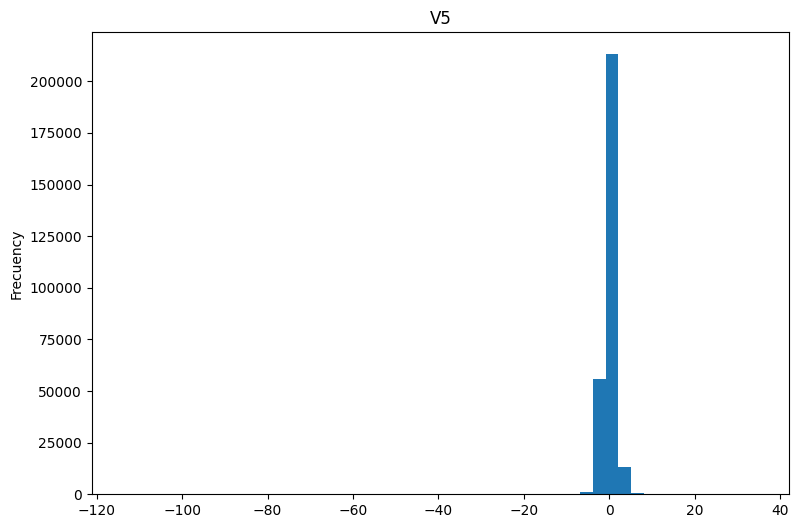

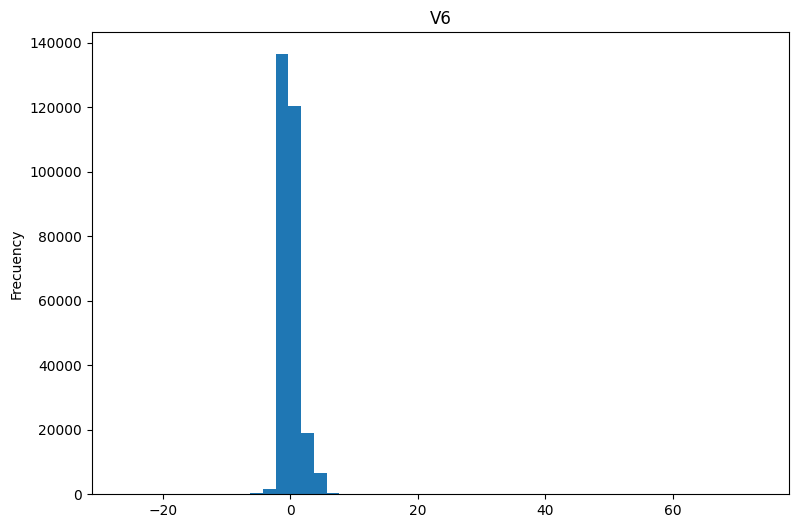

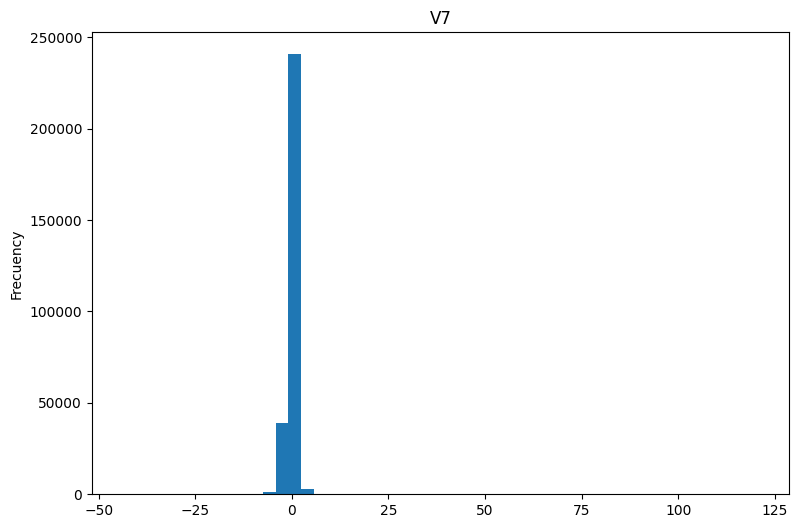

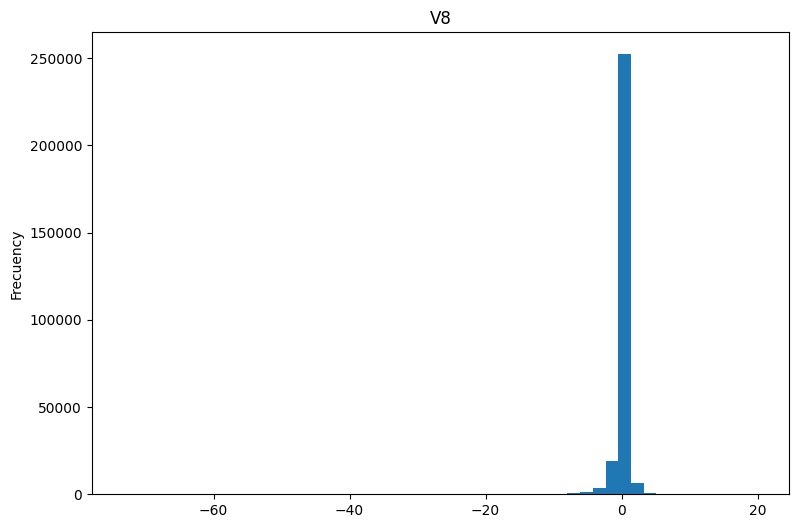

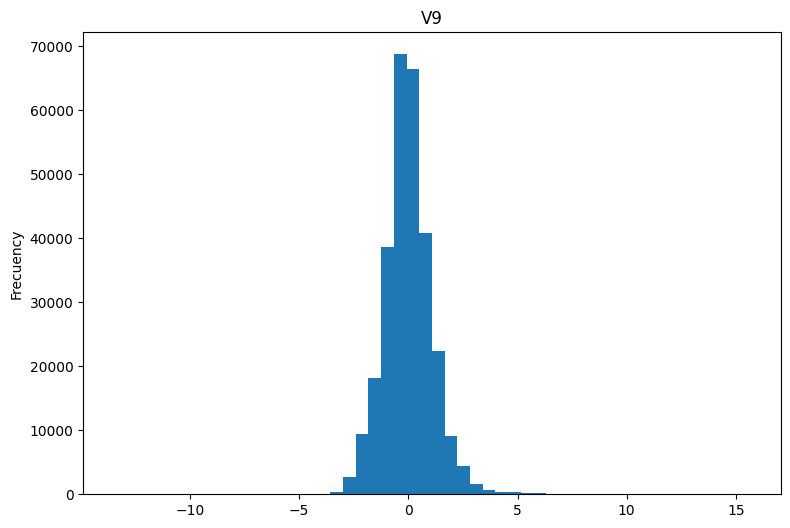

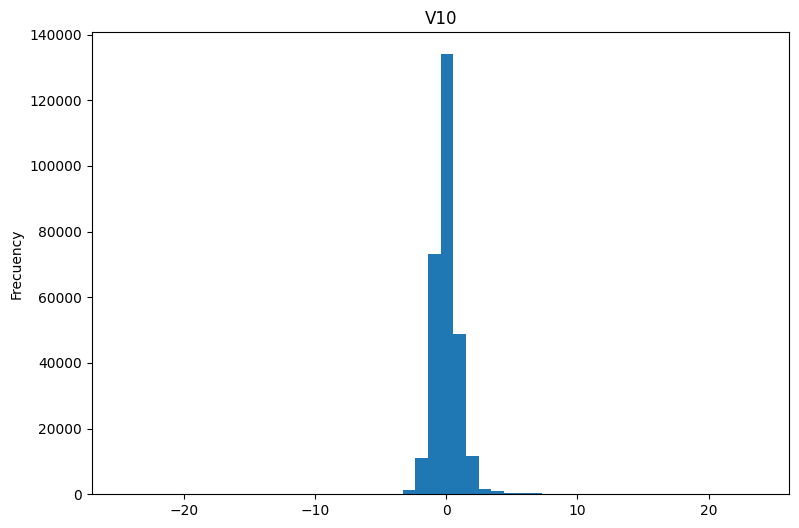

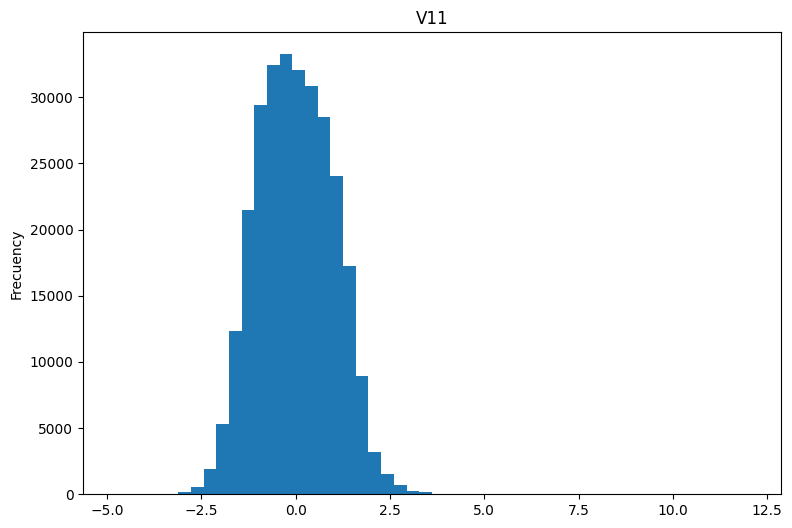

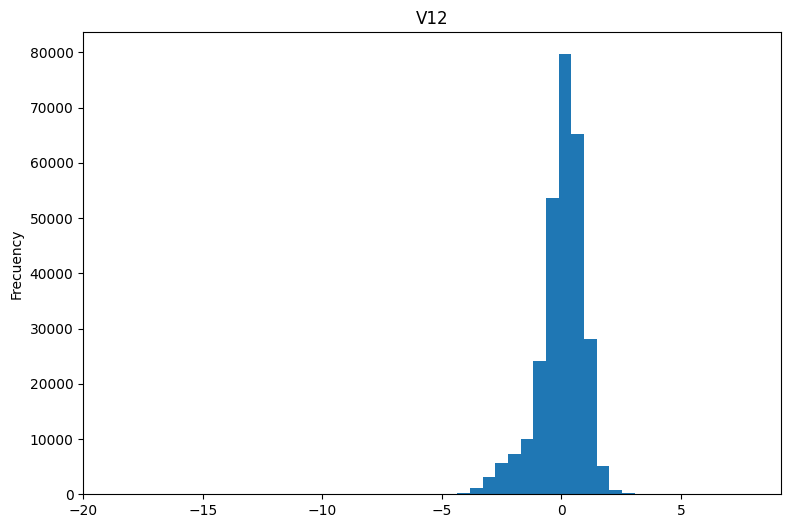

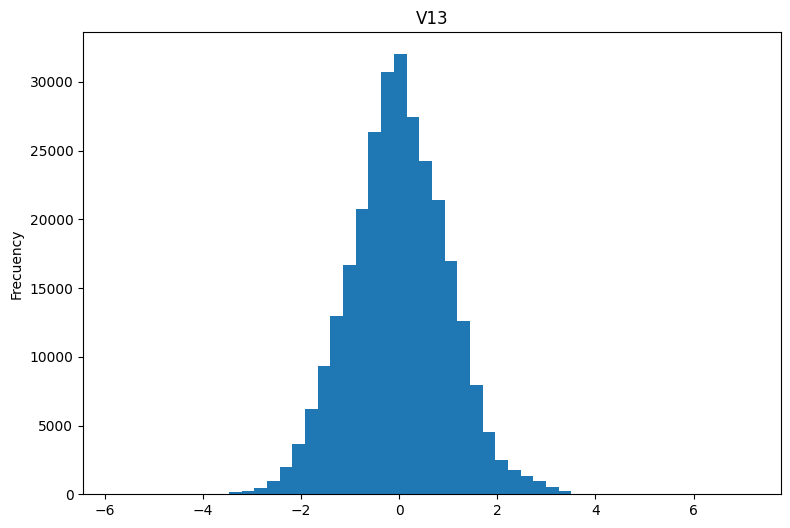

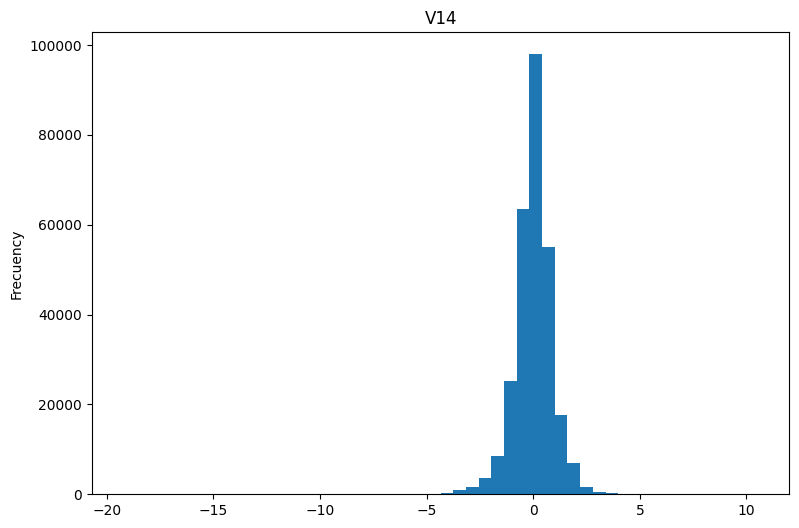

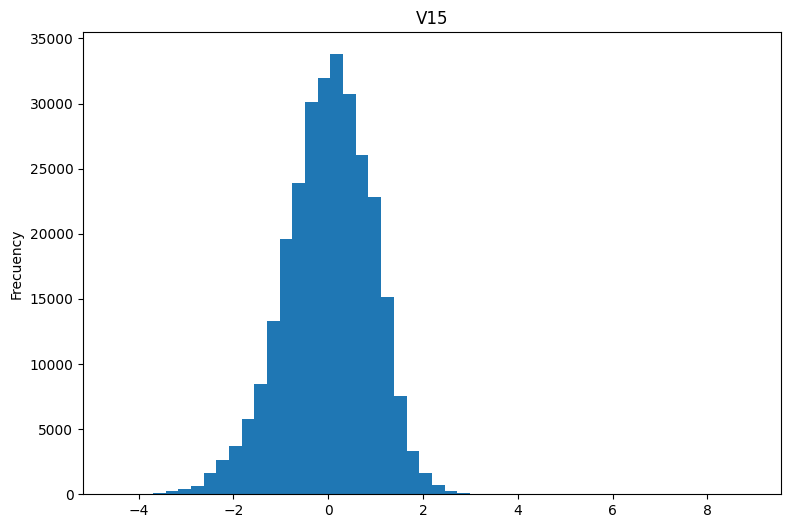

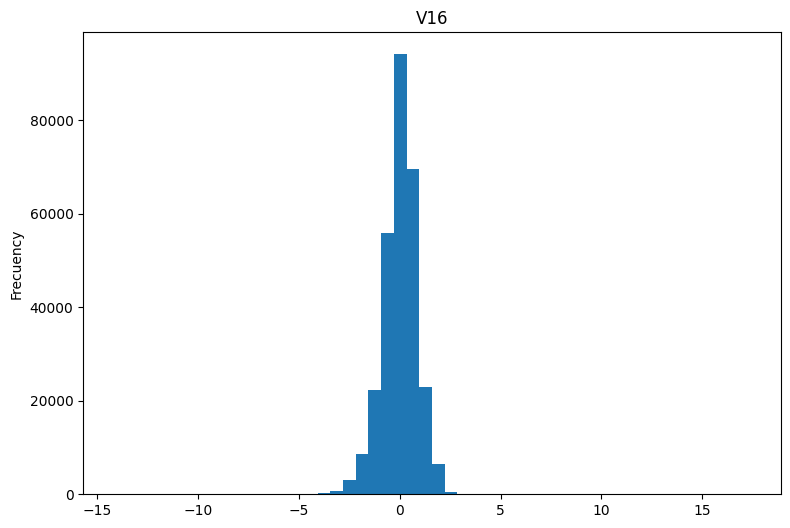

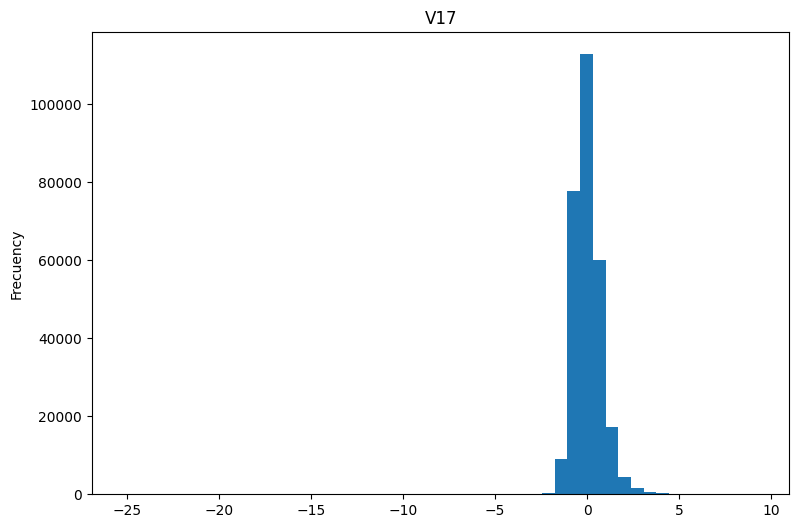

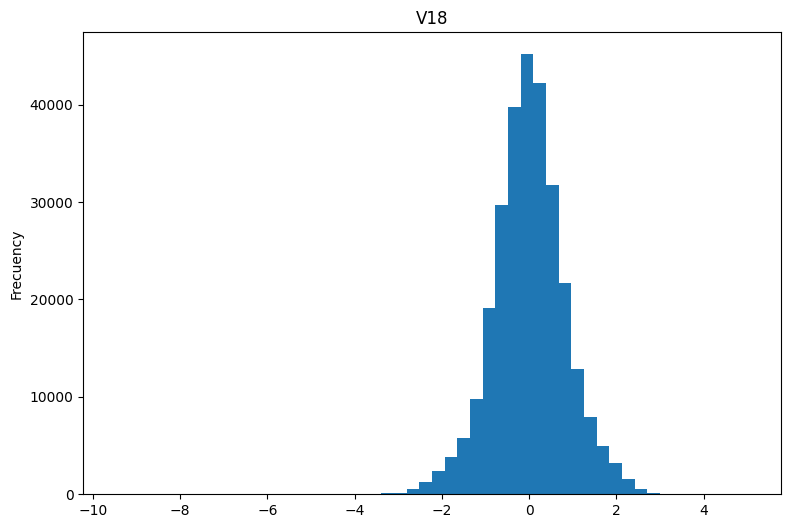

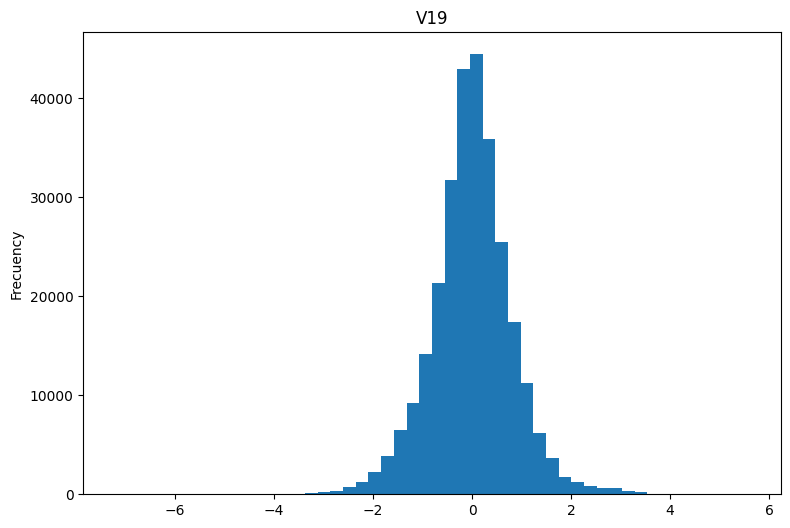

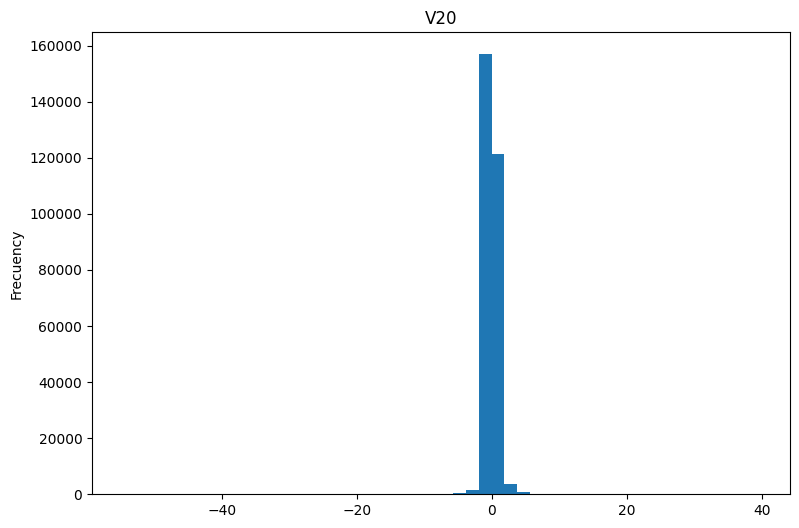

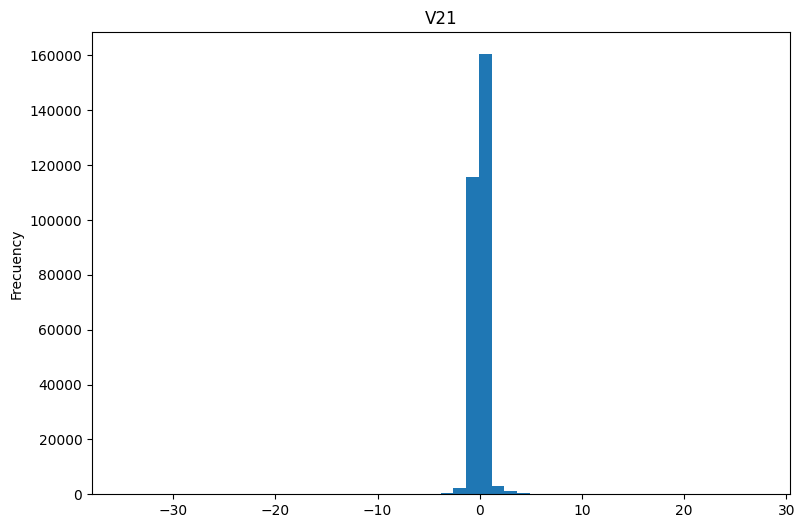

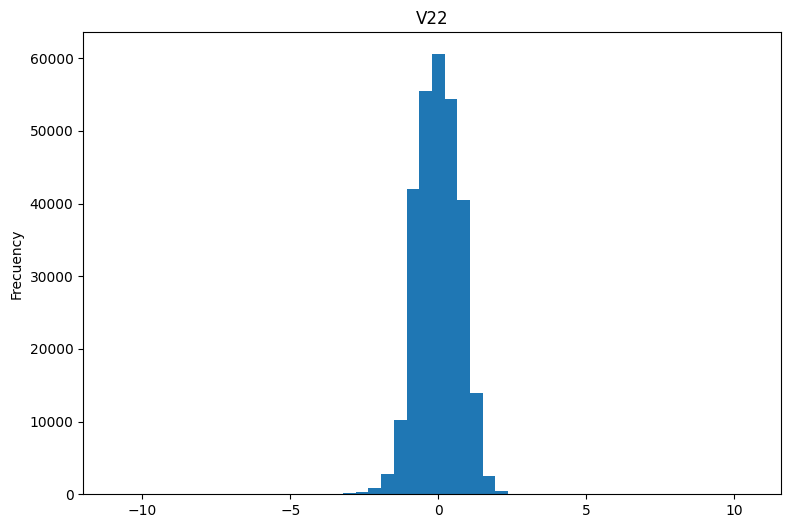

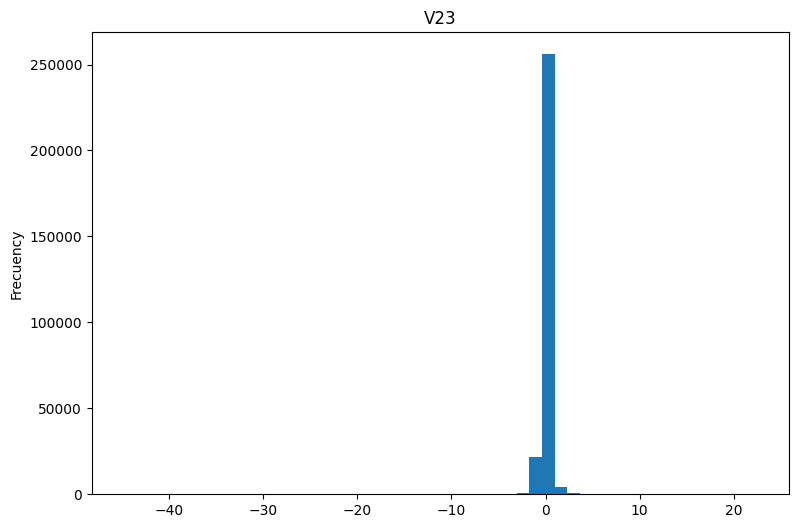

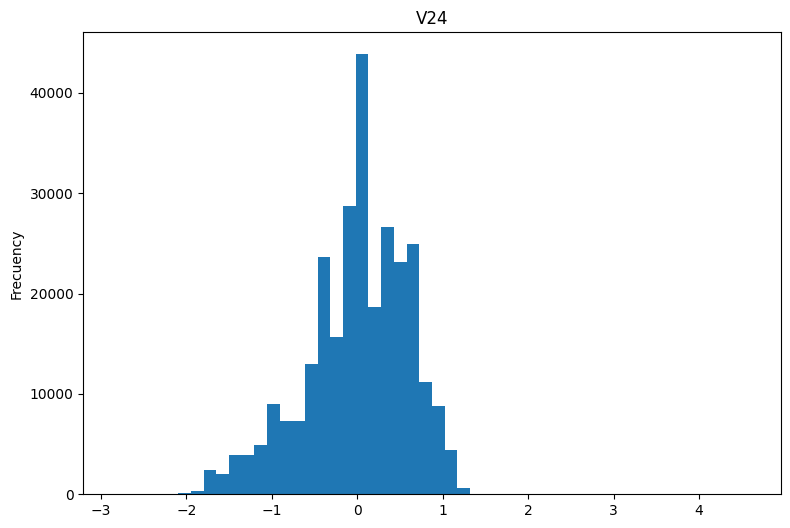

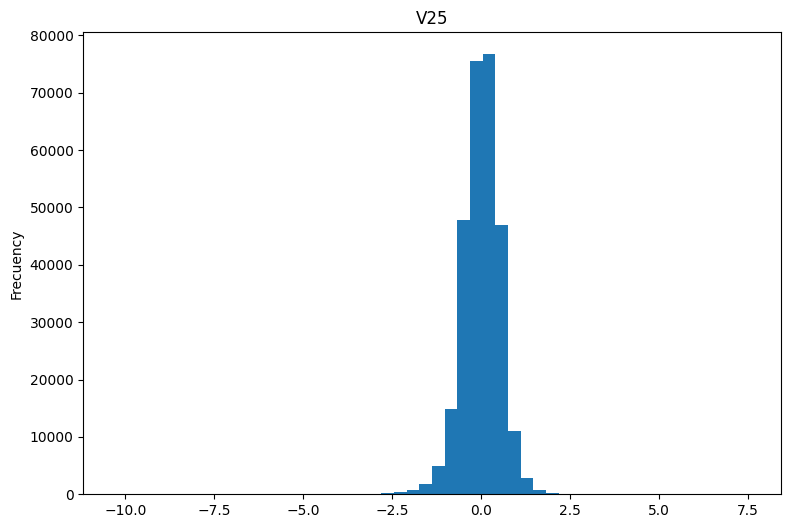

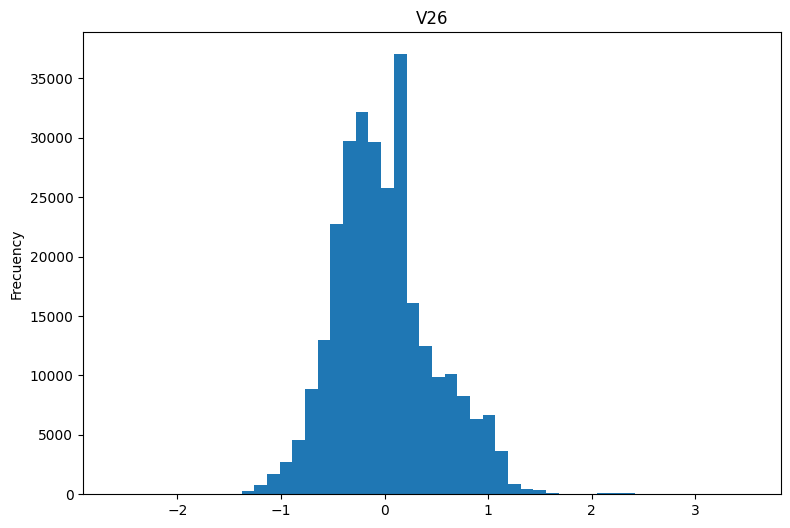

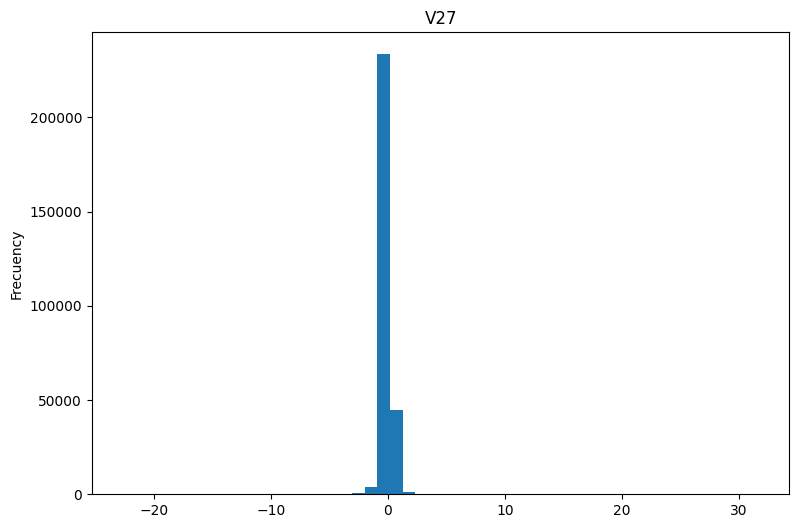

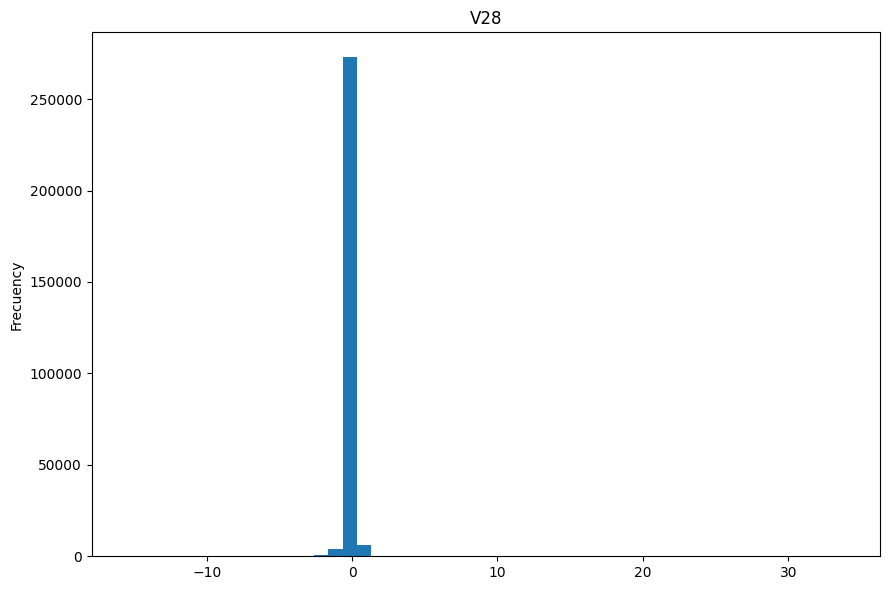

In [16]:
plt.rcParams.update({'figure.max_open_warning': 0})

features = df.iloc[:,1:29].columns

for i, f in enumerate(df[features]):
    fig, ax = plt.subplots(figsize=(9, 6))
    df[f].hist(bins=50, ax=ax, grid=False)
    ax.set_title(f, color='black')
    ax.set_ylabel("Frecuency")

fig.tight_layout()
plt.show()

## 4. Data balancing and normalization

To address the asymmetry that exists between fraud and non-fraud in the dataset, we take a random sample from the set of legitimate transactions of the same size as the set of fraudulent transactions. There are more sophisticated methods that will be analyzed and considered in the future [[2](https://www.aaai.org/Papers/Workshops/2000/WS-00-05/WS00-05-003.pdf), [3](https://ieeexplore.ieee.org/abstract/document/7376606),[10](https://ieeexplore.ieee.org/abstract/document/7376606),[11](https://www.sciencedirect.com/science/article/abs/pii/S0925231220306639),[12](https://www.sciencedirect.com/science/article/abs/pii/S0957417421001913)].

In [17]:
# Fraudulent transactions
fraud_tx = df.loc[df['Class'] == 1]

# Choose a random sample of legitimate observations of the same size as the fraudulent ones
legitimate_tx = df.loc[df['Class'] == 0].sample(n=fraud_tx.shape[0], random_state=7)

# Define new dataset
balance_df = pd.concat([fraud_tx, legitimate_tx])

In [18]:
balance_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [19]:
balance_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
259245,159027.0,1.792663,-0.045046,-1.948241,1.356496,0.481150,-1.361523,1.020553,-0.568261,-0.220205,...,0.215496,0.445274,-0.133709,0.003008,0.418642,-0.497243,-0.052997,-0.038930,144.00,0
273789,165700.0,1.842397,-0.521205,-4.030779,-0.621478,3.093832,2.703975,0.611700,0.385760,-0.096242,...,0.378423,0.868133,-0.308482,0.788056,0.810346,0.127778,-0.085250,-0.066571,149.46,0
196526,131551.0,2.079355,-0.964040,-0.644904,-0.483380,-0.875012,-0.318129,-0.786615,-0.110378,-0.022971,...,-0.642962,-1.365374,0.387561,-0.761005,-0.665203,0.272898,-0.021209,-0.037681,54.75,0
104629,69159.0,-1.089481,1.733716,0.366194,0.605195,0.264696,-0.390320,0.416644,0.243195,-0.456449,...,0.106197,0.368343,-0.257293,-0.416972,-0.011827,-0.288130,0.144697,0.196451,0.88,0
26700,34213.0,0.637783,-1.342133,0.129797,0.601724,-0.850978,0.549670,-0.290996,0.231801,-1.130368,...,-0.056718,-0.355168,-0.188398,-0.343582,0.168311,-0.312919,0.012889,0.060823,300.00,0


In [20]:
balance_df.shape

(984, 31)

Class Observations 

Class
1    492
0    492
Name: count, dtype: int64


Text(0.5, 1.0, 'Comparison of number of fraudulent transactions (1) vs. non-fraudulent (0)')

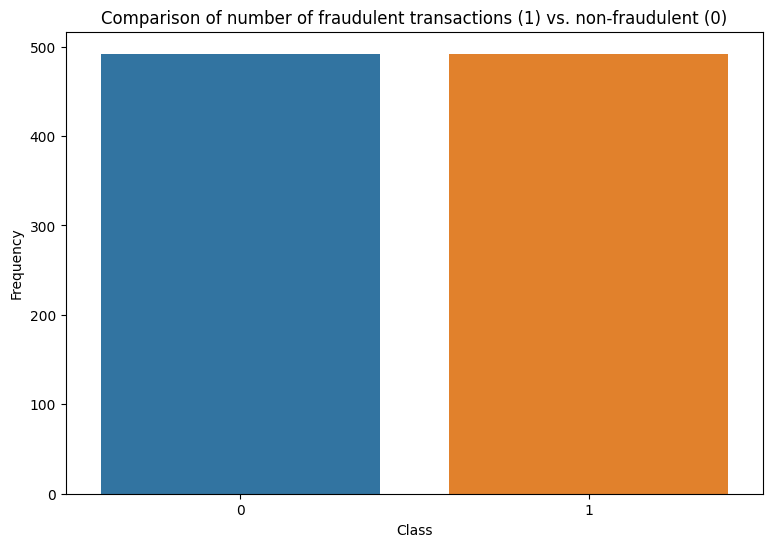

In [21]:
#Check that the number of observations of legitimate and fraudulent transactions is the same
print("Class","Observations", "\n")
print(balance_df['Class'].value_counts())

#Plot to make it more intuitive
fig, ax = plt.subplots(figsize=(9, 6))
ax = sns.countplot(data=balance_df, x="Class")

ax.set_xlabel("Class")
ax.set_ylabel("Frequency")
ax.set_title("Comparison of number of fraudulent transactions (1) vs. non-fraudulent (0)")

In [22]:
# Import StandardScaler from scikit-learn to normalize
from sklearn.preprocessing import StandardScaler

# Split the balanced dataframe into a matrix of features X and the response variable y.
X = balance_df.drop(['Class'], axis = 1)
y = balance_df['Class']

# Save the column names of the variables
features_columns = X.columns

# Normalize the matrix X
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Pass matrix X as a pandas dataframe
X_normalized = pd.DataFrame(X_normalized, columns=features_columns)

X_normalized.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.797947,0.014813,0.040754,0.295612,0.527579,0.245227,-0.376506,0.026506,0.230788,-0.634747,...,-0.042781,0.063778,-0.019493,-0.360382,0.644788,0.024182,0.342750,0.172717,-0.399059,-0.289088
1,-1.796566,-0.118072,-1.345655,0.726350,-0.010982,0.674882,-0.183480,0.499483,-0.070416,0.438009,...,1.749212,0.115716,0.383181,1.139488,-0.454592,0.365360,-0.332313,-0.323601,-0.001228,1.074864
2,-1.713075,0.016426,-0.011548,0.495169,0.002126,0.176865,0.344296,0.538594,-0.138802,0.452045,...,-0.547997,-0.227939,-0.787433,0.159299,-0.084898,-0.266756,-1.162074,-0.041274,-0.420730,0.329537
3,-1.660260,-0.364182,-0.120327,0.138694,0.112261,0.106892,-0.525917,-0.131894,-0.107768,0.447961,...,-0.313579,0.084034,0.161950,-0.336754,-0.024329,0.325638,-1.401979,-0.878292,1.807074,-0.136965
4,-1.649107,0.659230,0.330487,-0.134557,0.759130,1.191838,-0.339792,0.728766,-0.158864,0.003648,...,-0.149687,-0.258463,-0.592132,-0.516459,-2.851826,2.118681,1.155157,-0.089158,0.245480,-0.286510


When performing a dataset reduction, what is expected is that the correlation between the variables will change. To check this, we build the correlation matrix of the balanced dataset.

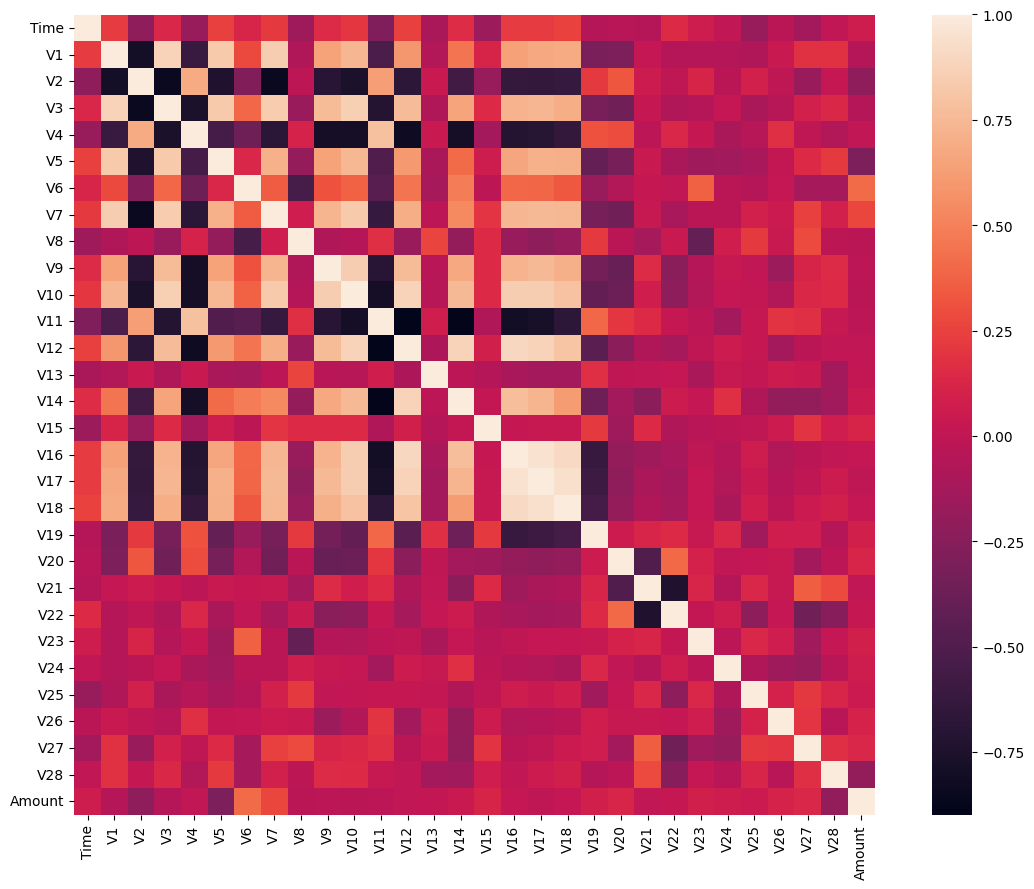

In [23]:
corr_balance_df= X_normalized.corr()
fig, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corr_balance_df, vmax=1.0, square = True)
plt.tight_layout()

We observe that the features from V1 to V18 are correlated, which indicates that there are redundant variables. We take these variables to continue with the analysis, although a PCA could be performed on them to further reduce the number of dimensions.

## 5. Implementation and evaluation of machine learning algorithms

We apply six different ML models:

- Logistic Regression (LR)
- Random Forest (RF)
- K-Nearest Neighbors (KNN)
- Support Vector Machines (SVM)
- Decision Tree (DT)
- Gradient Boosting (XGB)
- Neural Networks

## 6. Logistic Regression

**Logistic regression** is a statistical learning model that allows predicting the conditional probability of a binary event (response variable) based on the values taken by the predictors (independent variables).

### 6.1. Odds ratio

Suppose we are interested in predicting whether a specific event or positive class will occur, such as the diagnosis of a disease. We denote the probability of this event occurring as $p$, and therefore, $1−p$ represents the probability of it not occurring.

The odds ratio is calculated as the ratio between the probability of the event occurring ($p$) and the complementary probability ($1−p$):

$$
OR = \frac{p}{1−p}
$$

In other words, the odds ratio is a statistical measure that allows comparing the probability of the event (positive class) with the probability of it not occurring (negative class). It provides a measure of how much more likely an event (belonging to a class) is compared to the probability of it not occurring (belonging to the other class). The following cases can occur:

- $OR > 1$: Indicates that the odds in favor of the event are greater than the odds against it.
- $OR < 1$: Indicates that the odds against the event are greater than the odds in favor.
- $OR = 1$: Suggests that the odds in favor and against are equal.

To illustrate, let's assume $p$ is equal to 0.8; then, the odds ratio would be $\frac{0.8}{0.2}=4$. This indicates that the odds in favor of the event are four times greater than the odds against it.

### 6.2. Odds Ratio Logarithm

Given that, in general, the probability of the occurrence of the positive class depends on predictor variables $X$, it allows modeling the odds ratio with a function dependent on certain parameters to be estimated using some fitting technique. In many cases of interest, the logarithm of the odds ratio can be modeled with a linear function in predictors $X$, that is:

$$
\log{\left[ \frac{p(X)}{1 - p(X)} \right]} = \theta_0 + \theta_1 X
$$

The quantity on the left-hand side in the above equation is known as the ***log odds*** or ***logit***.

From the above equation, we can derive the dependency of the probability of positive cases in terms of the predictor:

$$ 
\frac{p(X)}{1 - p(X)} = e^{\theta_0 + \theta_1 X}
$$

$$
\Rightarrow p(X) = \frac{e^{\theta_0 + \theta_1 X}}{1 + e^{\theta_0 + \theta_1 X}}
$$

$$
\Rightarrow p(X) = \frac{1}{1 + e^{-\left( \theta_0 + \theta_1 X \right)}}
$$

The function on the right-hand side of the last expression is known as the **sigmoid function** or **logistic function**. From this model, we can calculate the probability of positive cases by estimating the parameters $\theta_0$ and $\theta_1$ from the training data. In other words, given a set of observations $TD = \{ (x_i, y_i), y_i = 0,1 \}$ where the probability of $y_i$ is:

$$
p_i = p(x_i) = \frac{1}{1 + e^{-\left( \theta_0 + \theta_1 X \right)}}
$$

We want to find the set of parameters $\theta_0$ and $\theta_1$ that best fit the training data. Then, binary classification will be determined by a threshold value of \(p_i\) (or equivalently \(1-p_i\)), which is generally set to 0.5. Thus, the following cases could occur:

- $y_i = 1 \iff p_i \geq 0.5 \iff \theta_0 + \theta_1 x_i \leq 0$
- $y_i = 0 \iff p_i < 0.5 \iff \theta_0 + \theta_1 x_i > 0$

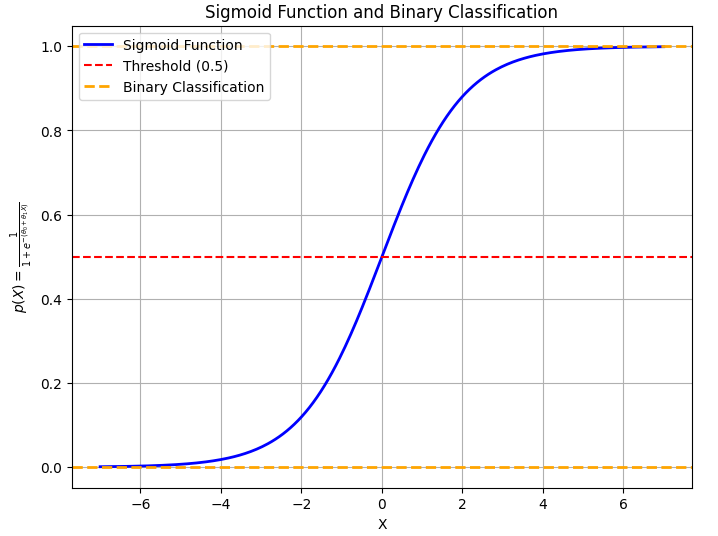

### 6.3. Parameter Estimation in Logistic Regression through Maximum Likelihood

#### 6.3.1. Bernoulli Trials

A **Bernoulli trial** refers to a **random experiment** with only two possible outcomes, usually labeled as success and failure, in honor of Jakob Bernoulli.

From a probabilistic standpoint, these trials are modeled by a random variable that can take only two values, 0 and 1, with 1 represent success.

The probability distribution associated with this type of trial is given by:

$$
P(X=k)=p^k \cdot (1−p)^{1−k}
$$

This distribution is known as the Bernoulli distribution. On the other hand, Bernoulli processes emerge when identical and independent Bernoulli trials are repeated over time. The probability of obtaining x successes in N trials is given by the binomial distribution:

$$ 
P(X=x) = \binom{N}{x} \cdot p^x \cdot (1-p)^{N-x}
$$

#### 6.3.2. Bernoulli Distributions and Maximum Likelihood Estimation for Logistic Regression

In logistic regression, we model the probability of a binary outcome (usually represented as 0 or 1) given a set of predictor variables. This probability follows a Bernoulli distribution, which is defined by the probability mass function:

$$
f(y_i, p) = p^{y_i} \cdot (1 - p)^{1 - y_i}
$$

Here, $y_i$ represents the binary outcome (0 or 1), and $p$ represents the probability of the outcome being 1.

Consider a training dataset $\mathrm{TD}$ consisting of $N$ observations, each associated with $M$ predictors. Let $y_i$ be the binary outcome for the $i$-th observation, where $y_i$ can take values 0 or 1. The predictors for the $i$-th observation are denoted as $x_{ij}$, where $j$ ranges from 1 to $M$.

Our goal is to determine the parameters $\vec{\theta} := (\theta_0, \theta_1, \dots, \theta_M)$ that best fit the logistic regression model to the training data. To achieve this objective we use the **maximum likelihood method**.

The likelihood function $L(\vec{\theta})$ represents the product of the joint probabilities of observing the data points given the parameter values. In logistic regression, it's the product of the individual Bernoulli probabilities for each observation.

$$
\begin{split}
L(\vec{\theta}) & = \prod_{i=1}^N f(Y = y_i | X = x_i) \\
& = \prod_{i=1}^N p(x_i, \vec{\theta})^{y_i}\left[1 - p(x_i, \vec{\theta})\right]^{1 - y_i }
\end{split}
$$

Here, $p(x_i, \vec{\theta})$ is the logistic function, which models the probability of the binary outcome being 1 given the predictors $x_i$ and the parameter vector $\vec{\theta}$.

To find the parameters $\vec{\theta}$ that maximize the likelihood function, we typically take the logarithm of the likelihood function and then use numerical optimization techniques. We use the log-likelihood insted likelihood, because it simplifies the calculations and because the logarithm is a monotone function, that is, it preserves the order of the values. Therefore, maximizing the log-likelihood is equivalent to maximizing the likelihood function itself, since the logarithm function is strictly increasing.

$$
\begin{split}
l(\vec{\theta}) = \log \left[L(\vec{\theta}) \right] & = \ln \left[ \prod_{i=1}^N f(Y = y_i | X = x_i) \right] \\
& = \sum_{i=1}^N y_i \log p(x_i, \vec{\theta}) + (1 - y_i)\log\left[ 1 - p(x_i, \vec{\theta}) \right] \\
& = \sum_{i=1}^N \log\left[ 1 - p(x_i, \vec{\theta}) \right] + y_i \biggl\{ \log p(x_i, \vec{\theta}) - \log\left[ 1 - p(x_i, \vec{\theta}) \right] \biggr\} \\
& = \sum_{i=1}^N \log\left[ 1 - p(x_i, \vec{\theta}) \right] + \sum_{i=1}^N y_i  \log \frac{p(x_i, \vec{\theta})}{1 - p(x_i, \vec{\theta})} \\
& = - \sum_{i=1}^N \log\left[ 1+\exp \left( \theta_0 + \sum_{j=1}^M x_{ij} \theta_j \right) \right] + \sum_{i=1}^N y_i \left(\theta_0 + \sum_{j=1}^M x_{ij} \theta_j \right)
\end{split}
$$

In the equation above we have used that:

$$
\begin{split}
1 - p(x_i, \vec{\theta}) & = 1 - \frac{1}{1+\exp \left[-\left( \theta_0 + \sum_{j=1}^M x_{ij} \theta_j \right)\right]} \\
& = \frac{\exp \left[-\left( \theta_0 + \sum_{j=1}^M x_{ij} \theta_j \right)\right]}{1+\exp \left[-\left( \theta_0 + \sum_{j=1}^M x_{ij} \theta_j \right)\right]} \\
& = \frac{1}{1+\exp \left( \theta_0 + \sum_{j=1}^M x_{ij} \theta_j \right)}
\end{split}
$$

$$
\begin{split}
\frac{\partial l}{\partial \theta_j} & = - \sum_{i=1}^N \frac{1}{1 + \exp \left(\theta_0 + \sum_{j=1}^M x_{ij} \theta_j \right)}\exp \left(\theta_0 + \sum_{j=1}^M x_{ij} \theta_j \right)x_{ij} + \sum_{i=1}^N y_i x_{ij}\\
& = \sum_{i=1}^N \left[ y_i - p(x_i, \vec{\theta}) \right]x_{ij} = 0 \,\,\, \forall j = 1, 2, \dots, M
\end{split}
$$

which correspond to a set of $M$ equations that will be solved using the **Newton-Raphson method** and in which it is required to know $\frac{\partial^2 l}{\partial \theta_j^2}$:

$$
\begin{split}
\frac{\partial^2 l}{\partial \theta_j^2} & = \sum_{i=1}^N \left[ y_i - p(x_i, \vec{\theta}) \right]x_{ij} \\
& = \sum_{i=1}^N \left[ \frac{\partial p(x_i, \vec{\theta})}{\partial \theta_j} \right]x_{ij} \\
& = \sum_{i=1}^N - \frac{1}{\biggl\{1+\exp \left[-\left( \theta_0 + \sum_{j=1}^M x_{ij} \theta_j \right)\right]\biggr\}^2} \biggl\{\exp \left[-\left( \theta_0 + \sum_{j=1}^M x_{ij} \theta_j \right)\right] \biggr\} x_{ij} \\
& = \sum_{i=1}^N \frac{1}{1+\exp \left[-\left( \theta_0 + \sum_{j=1}^M x_{ij} \theta_j \right)\right]}\frac{\exp \left[-\left( \theta_0 + \sum_{j=1}^M x_{ij} \theta_j \right)\right]}{1+\exp \left[-\left( \theta_0 + \sum_{j=1}^M x_{ij} \theta_j \right)\right]} x_{ij} \\
& = \sum_{i=1}^N p(x_i, \vec{\theta}) \left[1 - p(x_i, \vec{\theta}) \right]x_{ij}
\end{split}
$$

To implement Newton's method:

$$
\left\{
\begin{array}{l}
f(\vec{\theta}) =  \frac{\partial l}{\partial \theta_j} = \sum_{i=1}^N \left[ y_i - p(x_i, \vec{\theta}) \right]x_{ij} \\
f'(\vec{\theta}) = \frac{\partial^2 l}{\partial \theta_j^2} = \sum_{i=1}^N p(x_i, \vec{\theta}) \left[1 - p(x_i, \vec{\theta}) \right]x_{ij}
\end{array}
\right.
$$

and considering an initial value, say $\vec{\theta} = \vec{0}$ we can iterate the procedure to obtain the successive approximations by:

$$
\vec{\theta}^{(n+1)} =  \vec{\theta}^{(n)} - \frac{f\left[\vec{\theta}^{(n)}\right]}{f'\left[\vec{\theta}^{(n)}\right]}
$$

### 6.4. `Python` implementation of Logistic Regression

In [24]:
def logistic_regression_log_likelihood(X, y, theta):
    """
    Compute the log-likelihood for logistic regression.

    Parameters:
    X : numpy array, shape (N, 2)
        Feature matrix where each row represents a sample and each column represents a feature.
        The first column should be filled with ones for the intercept term.
    y : numpy array, shape (N,)
        Target variable vector where each element represents the class label (0 or 1).
    theta : numpy array, shape (2,)
        Parameter vector for logistic regression. theta[0] is the intercept, and theta[1] is the coefficient for the predictor.

    Returns:
    log_likelihood : float
        Log-likelihood value.
    """
    N = len(y)  # Number of samples
    z = X@theta  # Compute linear combination of features and parameters
    prob = 1 / (1 + np.exp(-z))  # Calculate probability of class 1
    log_likelihood = -np.sum(np.log(1 + np.exp(z))) + np.sum(y * z)  # Compute log-likelihood

    return log_likelihood

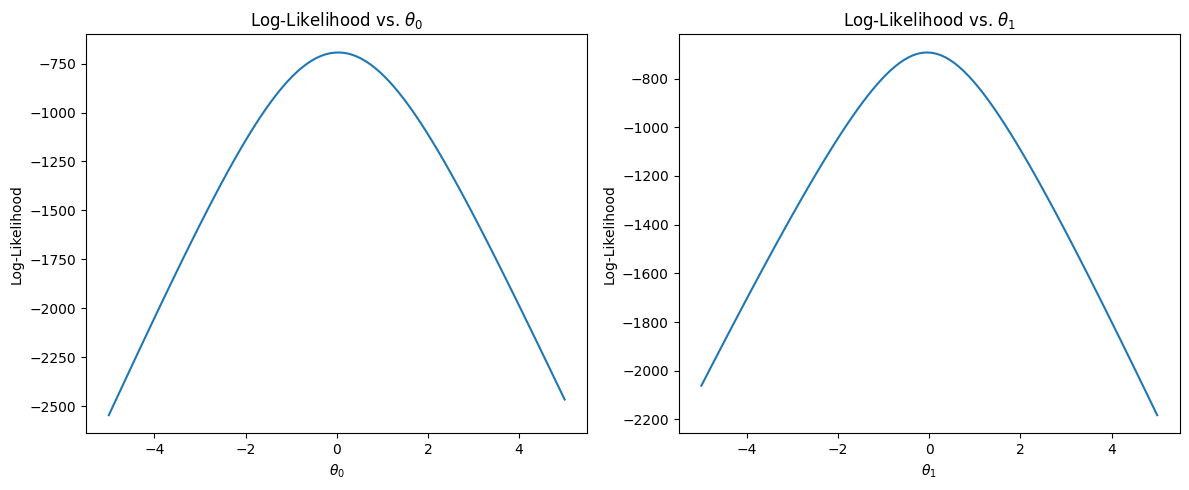

In [25]:
# Generate sample data
N = 1000
X = np.column_stack((np.ones(N), np.random.randn(N)))
y = np.random.randint(2, size=N)

# Define range of values ​​for theta0 and theta1
theta0_range = np.linspace(-5, 5, 100)
theta1_range = np.linspace(-5, 5, 100)

# Calculate log-likelihood for each value of theta0 and theta1
log_likelihood_theta0 = np.zeros_like(theta0_range)
log_likelihood_theta1 = np.zeros_like(theta1_range)

for i in range(len(theta0_range)):
    theta = np.array([theta0_range[i], 0])  # Keep theta1 constant at 0
    log_likelihood_theta0[i] = logistic_regression_log_likelihood(X, y, theta)

for i in range(len(theta1_range)):
    theta = np.array([0, theta1_range[i]]) # Keep theta0 constant at 0
    log_likelihood_theta1[i] = logistic_regression_log_likelihood(X, y, theta)

# Create plots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(theta0_range, log_likelihood_theta0)
plt.xlabel(r'$\theta_0$')
plt.ylabel('Log-Likelihood')
plt.title(r'Log-Likelihood vs. $\theta_0$')

plt.subplot(1, 2, 2)
plt.plot(theta1_range, log_likelihood_theta1)
plt.xlabel(r'$\theta_1$')
plt.ylabel('Log-Likelihood')
plt.title(r'Log-Likelihood vs. $\theta_1$')

plt.tight_layout()
plt.show()

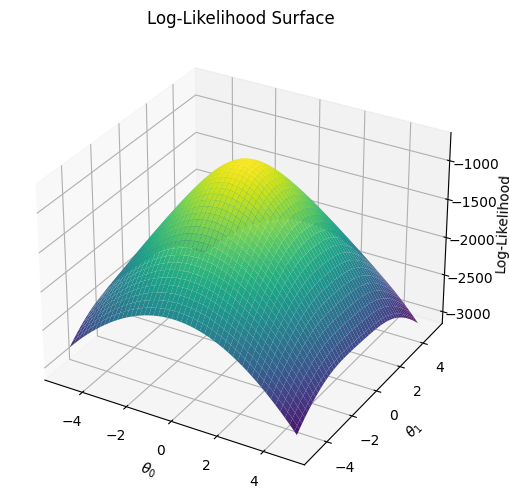

In [26]:
from mpl_toolkits.mplot3d import Axes3D

# Generate sample data
N = 1000
X = np.column_stack((np.ones(N), np.random.randn(N)))
y = np.random.randint(2, size=N)

# Define range of values ​​for theta0 and theta1
theta0_range = np.linspace(-5, 5, 100)
theta1_range = np.linspace(-5, 5, 100)
theta0_grid, theta1_grid = np.meshgrid(theta0_range, theta1_range)

# Calculate log-likelihood for each combination of theta0 and theta1
log_likelihood_grid = np.zeros_like(theta0_grid)
for i in range(len(theta0_range)):
    for j in range(len(theta1_range)):
        theta = np.array([theta0_range[i], theta1_range[j]])
        log_likelihood_grid[j, i] = logistic_regression_log_likelihood(X, y, theta)

# Create 3D plots
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta0_grid, theta1_grid, log_likelihood_grid, cmap='viridis')
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel('Log-Likelihood')
ax.set_title('Log-Likelihood Surface')
plt.show()

In [27]:
def logistic_regression_log_likelihood_derivative(X, y, theta):
    """
    Compute the derivative of the log-likelihood function for logistic regression.

    Parameters:
    X : numpy array, shape (N, M)
        Feature matrix where each row represents a sample and each column represents a feature.
        The first column should be filled with ones for the intercept term.
    y : numpy array, shape (N,)
        Target variable vector where each element represents the class label (0 or 1).
    theta : numpy array, shape (M,)
        Parameter vector for logistic regression.

    Returns:
    derivative : numpy array, shape (M,)
        Derivative of the log-likelihood function with respect to each parameter.
    """
    z = X@theta
    prob = 1 / (1 + np.exp(-z))
    derivative = X.T@(y - prob)
    return derivative

def logistic_regression_log_likelihood_second_derivative(X, y, theta):
    """
    Compute the second derivative of the log-likelihood function for logistic regression.

    Parameters:
    X : numpy array, shape (N, M)
        Feature matrix where each row represents a sample and each column represents a feature.
        The first column should be filled with ones for the intercept term.
    y : numpy array, shape (N,)
        Target variable vector where each element represents the class label (0 or 1).
    theta : numpy array, shape (M,)
        Parameter vector for logistic regression.

    Returns:
    second_derivative : numpy array, shape (M, M)
        Second derivative of the log-likelihood function with respect to each parameter.
    """
    z = np.dot(X, theta)
    prob = 1 / (1 + np.exp(-z))
    W = np.diag(prob * (1 - prob))
    second_derivative = - X.T @ W @ X
    return second_derivative

def newton_raphson(X, y, initial_theta, max_iter, tol):
    """
    Apply the Newton-Raphson optimization method to find the optimal parameters for logistic regression.

    Parameters:
    X : numpy array, shape (N, M)
        Feature matrix where each row represents a sample and each column represents a feature.
        The first column should be filled with ones for the intercept term.
    y : numpy array, shape (N,)
        Target variable vector where each element represents the class label (0 or 1).
    initial_theta : numpy array, shape (M,)
        Initial guess for the parameter vector.
    max_iter : int, optional
        Maximum number of iterations for the optimization algorithm. Default is 100.
    tol : float, optional
        Tolerance for the convergence criterion. The optimization stops when the change in parameters
        is smaller than this value. Default is 1e-6.

    Returns:
    theta : numpy array, shape (M,)
        Optimal parameter vector found by the Newton-Raphson method.
    """
    theta = initial_theta
    iter_count = 0
    while iter_count < max_iter:
        f = logistic_regression_log_likelihood_derivative(X, y, theta)
        f_prime = logistic_regression_log_likelihood_second_derivative(X, y, theta)
        theta += -np.linalg.inv(f_prime) @ f
        
        # Check for convergence
        if np.linalg.norm(f) < tol:
            break
        
        iter_count += 1
    
    return theta

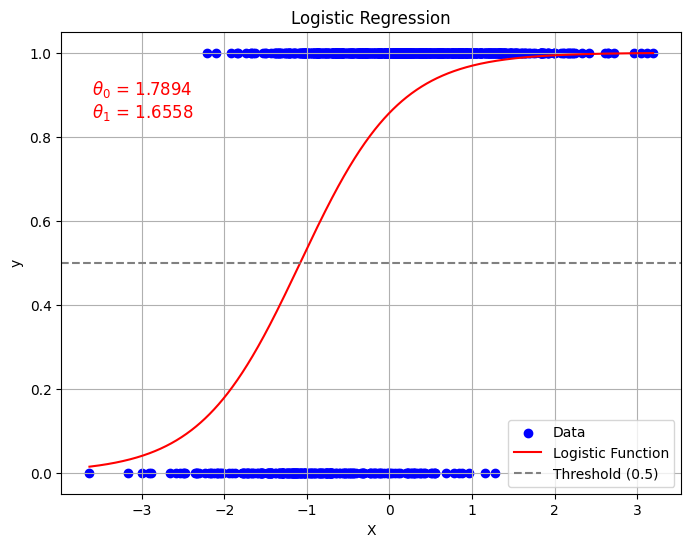

In [28]:
np.random.seed(12)

def generate_logistic_data(N, M, noise=0.1):
    """
    Generate synthetic logistic regression data.

    Parameters:
    N : int
        Number of samples.
    noise : float, optional
        Standard deviation of the Gaussian noise to be added to the data. Default is 0.1.

    Returns:
    X : numpy array, shape (N, 2)
        Feature matrix with an additional column for the intercept term.
    y : numpy array, shape (N,)
        Target variable vector.
    """
    # Generate feature matrix with intercept column
    X = np.random.randn(N, 1)
    intercept_column = np.ones((N, 1))
    X = np.hstack((intercept_column, X))

    # Generate parameter vector for generating data
    true_theta = np.random.randn(M)

    # Generate target variable based on logistic function
    z = X @ true_theta
    prob = 1 / (1 + np.exp(-z))
    y = np.random.binomial(1, prob)

    # Add Gaussian noise to the features
    X[:, 1] += np.random.normal(scale=noise, size=(N,))

    return X, y

# Generate example data
N = 1000
M = 2
X, y = generate_logistic_data(N, M)

# Initial value of theta
initial_theta = np.zeros(M)

# Number of iterations
n_iter = 1e6

# Tolerance
tol = 1e-6

# Apply the Newton-Raphson method
theta_optimal = newton_raphson(X, y, initial_theta, n_iter, tol)

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 1], y, color='blue', label='Data')
plt.xlabel('X')
plt.ylabel('y')

# Plot the logistic function with optimal parameters
x_values = np.linspace(min(X[:, 1]), max(X[:, 1]), N)
logistic_function = 1 / (1 + np.exp(-(theta_optimal[0] + theta_optimal[1] * x_values)))
plt.plot(x_values, logistic_function, color='red', label='Logistic Function')

# Plot threshold line at 0.5
plt.axhline(y=0.5, color='gray', linestyle='--', label='Threshold (0.5)')

# Display the optimal parameters
plt.text(0.05, 0.9, fr'$\theta_0$ = {theta_optimal[0]:.4f}', 
         transform=plt.gca().transAxes, fontsize=12, 
         verticalalignment='top', color='red')
plt.text(0.05, 0.85, fr'$\theta_1$ = {theta_optimal[1]:.4f}', 
         transform=plt.gca().transAxes, fontsize=12, 
         verticalalignment='top', color='red')

plt.title('Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

## 7. Random Forest (RF) 

## 8. K-Nearest Neighbors (KNN)